In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import datetime

__1. Softmax classification with mnist for tf.keras.datasets__

In [10]:
#loading mnist dataset from tf.keras.datasets
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0
#x_train[0]

<class 'numpy.ndarray'> (60000, 28, 28) <class 'numpy.ndarray'> (60000,)


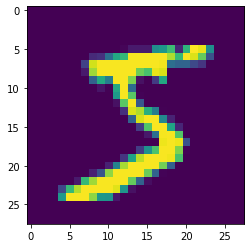

5

In [11]:
#understanding the dataset
print(type(x_train),x_train.shape,type(y_train),y_train.shape)
plt.imshow(x_train[0])
plt.show()
y_train[0]

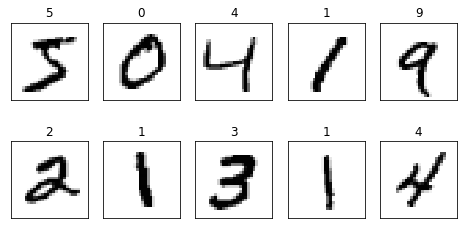

In [12]:
fig = plt.figure(figsize=(8,4))
for c, (image,label) in enumerate(zip(x_train[:10], y_train[0:10])):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title(label)
    subplot.imshow(image,vmin=0, vmax=1,
                  cmap=plt.cm.gray_r, interpolation = "nearest")

In [13]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
# tensorboard preparation
logdir = "logs$$fit$$"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir, histogram_freq=1)

In [18]:
# fitting the model and keeping the outcome in result object
result = model.fit(x_train, y_train, epochs=7, batch_size = 128, validation_split = 0.25, callbacks = [tensorboard_callback])

Epoch 1/7
352/352 [==============================] - 1s 2ms/step - loss: 0.4601 - accuracy: 0.8691 - val_loss: 0.2277 - val_accuracy: 0.9358
Epoch 2/7
352/352 [==============================] - 1s 2ms/step - loss: 0.2153 - accuracy: 0.9379 - val_loss: 0.1692 - val_accuracy: 0.9505
Epoch 3/7
352/352 [==============================] - 1s 2ms/step - loss: 0.1627 - accuracy: 0.9525 - val_loss: 0.1386 - val_accuracy: 0.9595
Epoch 4/7
352/352 [==============================] - 1s 2ms/step - loss: 0.1316 - accuracy: 0.9619 - val_loss: 0.1214 - val_accuracy: 0.9642
Epoch 5/7
352/352 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9687 - val_loss: 0.1125 - val_accuracy: 0.9667
Epoch 6/7
352/352 [==============================] - 1s 2ms/step - loss: 0.0958 - accuracy: 0.9722 - val_loss: 0.1030 - val_accuracy: 0.9689
Epoch 7/7
352/352 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9754 - val_loss: 0.0995 - val_accuracy: 0.9713


In [19]:
# Evaluating
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.0863 - accuracy: 0.9742 - 181ms/epoch - 577us/step


[0.08632748574018478, 0.9742000102996826]

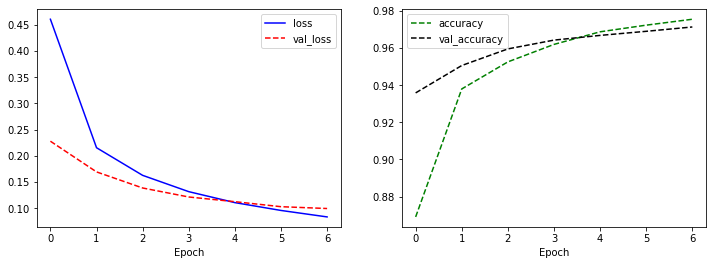

In [20]:
# Checking loss and accuracy 
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(result.history['loss'],'b-', label ='loss')
plt.plot(result.history['val_loss'],'r--',label ='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(result.history['accuracy'],'g--',label = 'accuracy')
plt.plot(result.history['val_accuracy'],'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [21]:
# Prediction for testset
pred_prob = model.predict(x_test)
print(pred_prob.shape, type(pred_prob))
print(np.round(pred_prob[:20,:],3))

(10000, 10) <class 'numpy.ndarray'>
[[0.    0.    0.    0.002 0.    0.    0.    0.998 0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.996 0.    0.    0.    0.    0.    0.002 0.001 0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.998 0.    0.    0.    0.    0.001]
 [0.    0.999 0.    0.    0.    0.    0.    0.001 0.    0.   ]
 [0.    0.    0.    0.    0.997 0.    0.    0.    0.001 0.002]
 [0.    0.    0.001 0.    0.001 0.    0.    0.    0.    0.997]
 [0.    0.    0.001 0.    0.    0.163 0.836 0.    0.    0.   ]
 [0.    0.    0.    0.    0.003 0.    0.    0.001 0.    0.996]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.    0.    0.997 0.    0.001 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.999]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.999 0.    0.001 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.   

In [24]:
# finding predicted class
pred_class = tf.argmax(pred_prob,1)
for predicted, label in zip(pred_class[:10],y_test[:10]):
    print(predicted.numpy(), label)
    
# wrong predictions
mistake = [(k,i,j) for k,(i,j) in enumerate(zip(pred_class.numpy(),y_test)) if i !=j]

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
6 5
9 9


In [25]:
print(len(mistake),mistake[0])

258 (8, 6, 5)


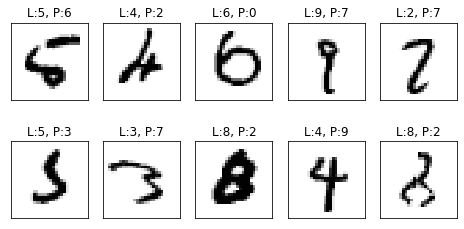

In [26]:
#illustrating wrong predictions
fig = plt.figure(figsize=(8,4))
for i,j in enumerate(mistake[0:10]):
    subplot = fig.add_subplot(2,5,i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title(f'L:{j[-1]}, P:{j[-2]}')
    subplot.imshow(x_test[j[0]], vmin=0, vmax=1,
                  cmap=plt.cm.gray_r, interpolation = 'nearest')

In [38]:
# Rechecking accuracy
correct_prediction = tf.math.equal(pred_class, y_test)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
accuracy.numpy()

0.9742

In [40]:
print(type(correct_prediction),correct_prediction.shape)
wrong = [i for i,j in enumerate(correct_prediction.numpy()) if j == False]

for i in range(len(wrong)):
    print(np.round(pred_prob[wrong[i],:],3),np.argmax(pred_prob[wrong[i]]),y_test[wrong[i]])

<class 'tensorflow.python.framework.ops.EagerTensor'> (10000,)
[0.    0.    0.001 0.    0.    0.163 0.836 0.    0.    0.   ] 6 5
[0.    0.    0.805 0.    0.004 0.    0.19  0.    0.    0.   ] 2 4
[0.808 0.    0.    0.    0.004 0.006 0.181 0.001 0.    0.   ] 0 6
[0.    0.079 0.005 0.02  0.001 0.001 0.    0.461 0.124 0.31 ] 7 9
[0.    0.    0.054 0.038 0.    0.    0.    0.9   0.007 0.   ] 7 2
[0.    0.001 0.    0.648 0.    0.349 0.001 0.    0.    0.   ] 3 5
[0.    0.001 0.04  0.426 0.    0.    0.    0.531 0.001 0.001] 7 3
[0.098 0.    0.424 0.011 0.004 0.001 0.05  0.    0.35  0.062] 2 8
[0.    0.    0.    0.    0.42  0.    0.    0.002 0.001 0.578] 9 4
[0.    0.014 0.886 0.027 0.    0.    0.    0.    0.072 0.   ] 2 8
[0.002 0.043 0.042 0.677 0.    0.002 0.012 0.    0.222 0.001] 3 8
[0.001 0.    0.393 0.    0.381 0.    0.214 0.    0.006 0.005] 2 4
[0.001 0.001 0.437 0.061 0.    0.    0.    0.004 0.493 0.002] 8 2
[0.    0.083 0.079 0.06  0.    0.001 0.005 0.003 0.769 0.   ] 8 1
[0.    0.    

__Softmax classification with data pipeline structure__

In [43]:
# Checking available datasets in tensorflow datasets
tfdata = tfds.list_builders()
print(len(tfdata), type(tfdata), tfdata[:10])
tfds.__version__

900 <class 'list'> ['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc']


'4.4.0'

In [47]:
# Fetching a full dataset and the dataset info 
mnist,info = tfds.load('mnist', with_info = True)
print(type(mnist))

<class 'dict'>


In [48]:
print(info, type(info))

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/Users/hyesoo/tensorflow_datasets/mnist/3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
) <class 'tensorflow_datase

In [49]:
#Dataset unpacking 
train_ds, test_ds = tfds.load('mnist', split = ['train','test'])
train_ds1, test_ds1 = mnist['train'],mnist['test']
print(type(test_ds),type(train_ds1))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'> <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [51]:
#Starting feed-forward neural net

#1. Data preparation
mnist_train, mnist_validate, mnist_test = tfds.load('mnist', split=['train[:80%]','train[80%:]','test'], as_supervised=True)

In [52]:
#2. Key training parameters
BUFFER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 6

In [53]:
#3. Scaling dat with function: Don't have to use this approach
def scale(image, lavel):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image,label

In [54]:
#4. Making data pipeline
train_data = mnist_train.map(scale).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
validation_data = mnist_validate.map(scale).batch(BATCH_SIZE).prefetch(1)
test_data = mnist_test.map(scale).batch(BATCH_SIZE)

#tensorboard setup
logdir = "logs$$fit$$"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir, histogram_freq=1)

In [56]:
image_batch, label_batch = next(iter(train_data))
print(image_batch.shape, label_batch.shape)
y = tf.squeeze(image_batch)
print(y.shape)

(32, 28, 28, 1) (32,)
(32, 28, 28)


tf.Tensor(9, shape=(), dtype=uint8)


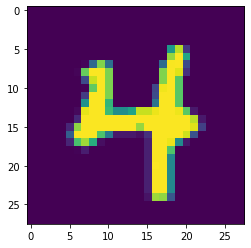

In [57]:
print(label_batch[0])
plt.imshow(y[0])
plt.show()

In [58]:
#6. Fitting the model
result = model.fit(train_data, validation_data = validation_data, epochs= NUM_EPOCHS,
                  callbacks = [tensorboard_callback])

Epoch 1/6
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0177 - accuracy: 0.9976 - val_loss: 1.8973e-08 - val_accuracy: 1.0000
Epoch 2/6
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2492e-08 - accuracy: 1.0000 - val_loss: 1.8964e-08 - val_accuracy: 1.0000
Epoch 3/6
1500/1500 [==============================] - 3s 2ms/step - loss: 2.7108e-08 - accuracy: 1.0000 - val_loss: 1.8824e-08 - val_accuracy: 1.0000
Epoch 4/6
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6311e-08 - accuracy: 1.0000 - val_loss: 1.8745e-08 - val_accuracy: 1.0000
Epoch 5/6
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2748e-08 - accuracy: 1.0000 - val_loss: 1.8586e-08 - val_accuracy: 1.0000
Epoch 6/6
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7183e-08 - accuracy: 1.0000 - val_loss: 1.7930e-08 - val_accuracy: 1.0000


In [59]:
#7. Calculating accuracy 
loss, acc = model.evaluate(test_data)
print(f'Loss:{loss:.5f}, Accuracy:{acc:.5f}')

313/313 [==============================] - 1s 2ms/step - loss: 1.1551e-08 - accuracy: 1.0000
Loss:0.00000, Accuracy:1.00000


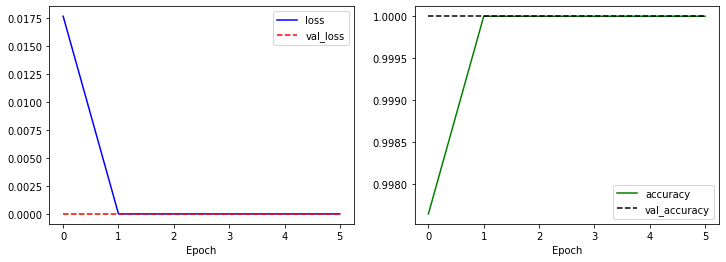

In [62]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(result.history['loss'], 'b-', label = 'loss')
plt.plot(result.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(result.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(result.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

__1. Functions used for data pipeline__

In [63]:
dataset = tf.data.Dataset.from_tensors(([1,2,3],'A'))
list(dataset.as_numpy_iterator())

[(array([1, 2, 3], dtype=int32), b'A')]

In [64]:
dataset = tf.data.Dataset.range(1,6)
dataset = dataset.map(lambda x: x + 1)
list(dataset.as_numpy_iterator())

[2, 3, 4, 5, 6]

In [65]:
dataset = tf.data.Dataset.range(10)
datast = dataset.take(5)
list(dataset. as_numpy_iterator())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [66]:
dataset = tf.data.Dataset.range(6)
dataset = dataset.shuffle(3, reshuffle_each_iteration = True)
dataset = dataset.repeat(2)
list(dataset.as_numpy_iterator())

[2, 1, 3, 4, 0, 5, 2, 0, 3, 5, 4, 1]

In [67]:
dataset = tf.data.Dataset.range(8)
dataset = dataset.batch(4)
list(dataset.as_numpy_iterator())

[array([0, 1, 2, 3]), array([4, 5, 6, 7])]

In [71]:
x = np.array([[[1],[2]],[[3],[4]]])
print(x, x.shape)

[[[1]
  [2]]

 [[3]
  [4]]] (2, 2, 1)


In [72]:
x1 = tf.squeeze(x)
print(x1, x1.shape)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int64) (2, 2)
